# Alpha Shapes with GeoPandas

## Sample Data

The data used in this notebook can be obtained from the Alaska Department of Transportation and Public Facilities website at the link below.  It consists of a point collection for each of the public airports in Alaska.

[http://www.dot.alaska.gov/stwdplng/mapping/shapefiles.shtml](http://www.dot.alaska.gov/stwdplng/mapping/shapefiles.shtml)

## Load the Shapefile

In [1]:
import os
import geopandas
data = os.path.join(os.getcwd(), 'data', 'Public_Airports_March2018.shp')
gdf = geopandas.read_file(data)
gdf

,OBJECTID,NAME,OWNER,ID,STATUS,REGION,LAT_DD,LONG_DD,FAA_ID,geometry
0,1,Adak Apt,DOT&PF Controlled,1.0,Standard,Southcoast,51.877964,-176.646031,ADK,POINT (-1537216.267 472136.932)
1,2,Atka Apt,DOT&PF Controlled,2.0,Standard,Southcoast,52.220586,-174.206183,AKA,POINT (-1365699.974 454797.756)
2,5,Unalaska / Dutch Harbor Apt,DOT&PF Controlled,5.0,Standard,Southcoast,53.900139,-166.543500,DUT,POINT (-820915.308 509535.633)
3,6,Saint Paul Island Apt,DOT&PF Controlled,6.0,Standard,Southcoast,57.166294,-170.222553,SNP,POINT (-969444.895 914620.508)
4,7,Saint George Apt,DOT&PF Controlled,7.0,Standard,Southcoast,56.577353,-169.663736,PBV,POINT (-952041.166 842699.145)
...,...,...,...,...,...,...,...,...,...,...
289,296,Coffman Cove SPB,DOT&PF Controlled,232.0,Sea Plane Base,Southcoast,56.014867,-132.833891,KCC,POINT (1296264.665 875508.837)
290,297,Metlakatla SPB,DOT&PF Controlled,239.0,Sea Plane Base,Southcoast,55.130754,-131.574266,MTM,POINT (1403173.580 807860.681)
291,299,Kodiak Lilly Lake SPB,Other Government,0.0,Sea Plane Base,Southcoast,57.803666,-152.379188,9Z3,POINT (96081.748 867965.213)
292,300,Kodiak Trident Basin SPB,Other Government,0.0,Sea Plane Base,Southcoast,57.778078,-152.397439,T44,POINT (95069.008 865081.797)


<AxesSubplot:>

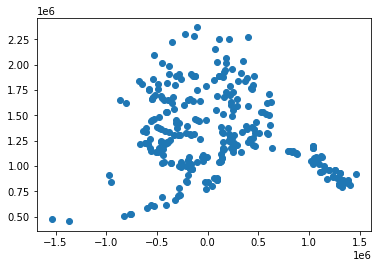

In [2]:
%matplotlib inline
gdf.plot()

In [3]:
gdf.crs

<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meters)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Generate Alpha Shape
The alpha shape will be generated in the coordinate frame the geodataframe is in.  In this example, we will project into an Albers Equal Area projection, construct our alpha shape in that coordinate system, and then convert back to the source projection.

### Project to Albers Equal Area Spatial Reference

<AxesSubplot:>

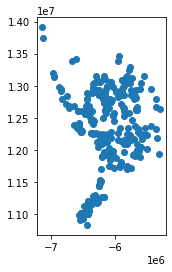

In [4]:
import cartopy.crs as ccrs
gdf_proj = gdf.to_crs(ccrs.AlbersEqualArea().proj4_init)
gdf_proj.plot()

### Determine the Alpha Shape

<AxesSubplot:>

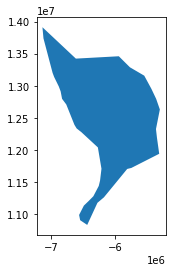

In [5]:
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))
import alphashape
alpha_shape = alphashape.alphashape(gdf_proj)
alpha_shape.plot()

### Plotting the Alpha Shape over the Data Points
#### Plate Carree Projection

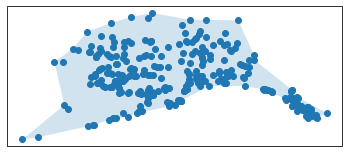

In [6]:
import matplotlib.pyplot as plt
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter([p.x for p in gdf_proj['geometry']],
           [p.y for p in gdf_proj['geometry']],
           transform=ccrs.AlbersEqualArea())
ax.add_geometries(
    alpha_shape['geometry'],
    crs=ccrs.AlbersEqualArea(), alpha=.2)
plt.show()

#### Robinson Projection

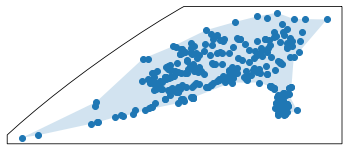

In [7]:
import matplotlib.pyplot as plt
ax = plt.axes(projection=ccrs.Robinson())
ax.scatter([p.x for p in gdf_proj['geometry']],
           [p.y for p in gdf_proj['geometry']],
           transform=ccrs.AlbersEqualArea())
ax.add_geometries(
    alpha_shape['geometry'],
    crs=ccrs.AlbersEqualArea(), alpha=.2)
plt.show()

### 3D Alpha Shapes with Geopandas

In [ ]:
import shapefile
import pye57
e57 = pye57.E57("data/Trimble_StSulpice-Cloud-50mm.e57")
data = e57.read_scan_raw(0)
with shapefile.Writer("data/Trimble_StSulpice-Cloud-50mm") as w:
    w.field('name', 'C')
    w.multipointz(list(zip(data["cartesianX"], data["cartesianY"], data["cartesianZ"])))
    w.record(name="pointcloud")

In [9]:
import os
import geopandas
data = os.path.join(os.getcwd(), 'data', 'Trimble_StSulpice-Cloud-50mm.shp')
gdf = geopandas.read_file(data)
gdf

DriverError: .shx file is unreadable, or corrupt.

In [ ]:
from alphashape import alphashape
alphashape([point.coords[0] for point in gdf['geometry'][0]], 0.7).show()